In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [20]:
#Passo 2 Criar um array com os dados
cliente_id = np.array([0,1,2,3,4,5,6,7,8,9,10]) #cria um array cliente id
valor_compra = np.array([40.0,150.0,500.0,5000.0,1834.0,2350.0,5000.0,6740.0,895.0,3300.0,4750.0]) #cria um array valor compra
dados_compra = np.column_stack((cliente_id,valor_compra)) #np.colum stack para empilhar os valores

In [21]:
#Passo 3 Cria cruster
kmeans = KMeans(n_clusters=6) #cria 3 clusters para agrupar os dados
kmeans.fit(dados_compra)# cria o modelo de machine learning para agrupamento dos dados

c:\Users\dsadm\Desktop\raphael\IABD-1\aula-9-detecção-de-fraude\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [22]:
#Passo 4 avaliar o desempenho do modelo de clusterização
sse = kmeans.inertia_ #metrica para avaliar o desempenho do cluster
print(sse)

258900.83333333334


In [23]:
#Passo 5 visualizar os dados da segmentação
labels = kmeans.labels_ #armazer os rutulos dos dados
centroids = kmeans.cluster_centers_ #armazena o centro dos clusteres

Text(0.5, 1.0, 'segmentação de clientes com base no valor da compra')

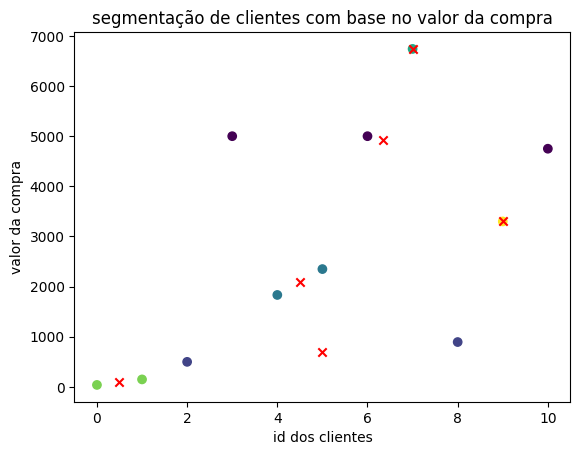

In [24]:
#Paasso 6  plotar a visualização dos dados
plt.scatter(dados_compra[:,0], dados_compra[:,1], c= labels) #plotar o grafico de disperção com os clusters
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='red') #plotar o grafico com o clusters 
plt.xlabel("id dos clientes")
plt.ylabel("valor da compra")
plt.title("segmentação de clientes com base no valor da compra")

In [25]:
dados_compra_df = pd.DataFrame(dados_compra,columns=['id dos clientes', 'valor da compra'])
dados_compra_df['grupo'] = labels
grouped_data = dados_compra_df.groupby('grupo').mean()
print(grouped_data)

       id dos clientes  valor da compra
grupo                                  
0             6.333333      4916.666667
1             5.000000       697.500000
2             4.500000      2092.000000
3             7.000000      6740.000000
4             0.500000        95.000000
5             9.000000      3300.000000
